In [1]:
import sys
sys.path.insert(0, '/home/marcelo/Worklab/MF_Model/Modules')

import mf_if_models as mf
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customize matplotlib
matplotlib.rcParams.update(
	{
		'text.usetex': False,
		'font.family': 'stixgeneral',
		'mathtext.fontset': 'stix',
		'font.size': 22,
		'ytick.color' : 'black',
		"xtick.color" : 'black',
		'axes.labelcolor' : 'black',
		'axes.edgecolor' : 'black'
	}
)


In [2]:
vec_w_I = np.array([0.1, 1.0, 10])
vec_w_I_label = ["0.1", "1", "10"]
vec_tau_E = np.linspace(0.1, 100, 100)

df_nu = pd.DataFrame({vec_w_I[0]:np.zeros_like(vec_tau_E),
					vec_w_I[1]:np.zeros_like(vec_tau_E),
					vec_w_I[2]:np.zeros_like(vec_tau_E)})



In [3]:
n = 30000

for w_I in vec_w_I:
    print(w_I, end='\t')
    for i, tau_E in enumerate(vec_tau_E):
        print(i, end=' ')
        model = mf.MCoBaIF(w_E = 0.5,
						w_I = w_I,
						tau_E = tau_E,
						tau_I = 10,
						nu_i = 0.005)
        E_I = model.E_I
        V_th = model.V_th

        vec_Vk = np.linspace(E_I, V_th, n + 1)

        df_nu[w_I][i] = model.calculate_firing_rate(vec_Vk)
    
    print()

0.1	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
1.0	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 
10.0	0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 


In [4]:
fRate_data_path = "../../Data/fRate_data/"

df_nu_sim_read = pd.read_csv(f"{fRate_data_path}firing_rate_wI.dat", index_col=0)

df_nu_sim_read

,tauA,0.1,1,10
0,0.100000,0.00,0.00,0.00
1,0.100000,0.00,0.00,0.00
2,0.100000,0.00,0.00,0.00
3,1.109091,139.55,0.55,0.00
4,1.109091,139.50,0.55,0.00
...,...,...,...,...
295,98.990909,492.40,492.40,489.15
296,98.990909,492.55,492.30,489.20
297,100.000000,492.45,492.30,489.50
298,100.000000,492.45,492.35,489.25


In [5]:
index = list(range(0, 200, 3))
df_nu_sim = pd.DataFrame({vec_w_I[0]:np.zeros_like(vec_tau_E),
					vec_w_I[1]:np.zeros_like(vec_tau_E),
					vec_w_I[2]:np.zeros_like(vec_tau_E)})

for w_I, w_I_label in zip(vec_w_I, vec_w_I_label):
	for i in range(len(vec_tau_E)):
		df_nu_sim[w_I][i] = df_nu_sim_read[w_I_label][3*i]

In [6]:
df_error = pd.DataFrame({vec_w_I[0]:np.zeros_like(vec_tau_E),
						vec_w_I[1]:np.zeros_like(vec_tau_E),
						vec_w_I[2]:np.zeros_like(vec_tau_E)})

for w_I in vec_w_I:
	for i, (nu_sim, nu_analyt) in enumerate(zip(df_nu_sim[w_I], df_nu[w_I])):
		df_error[w_I][i] = np.abs(nu_sim - nu_analyt * 1000)


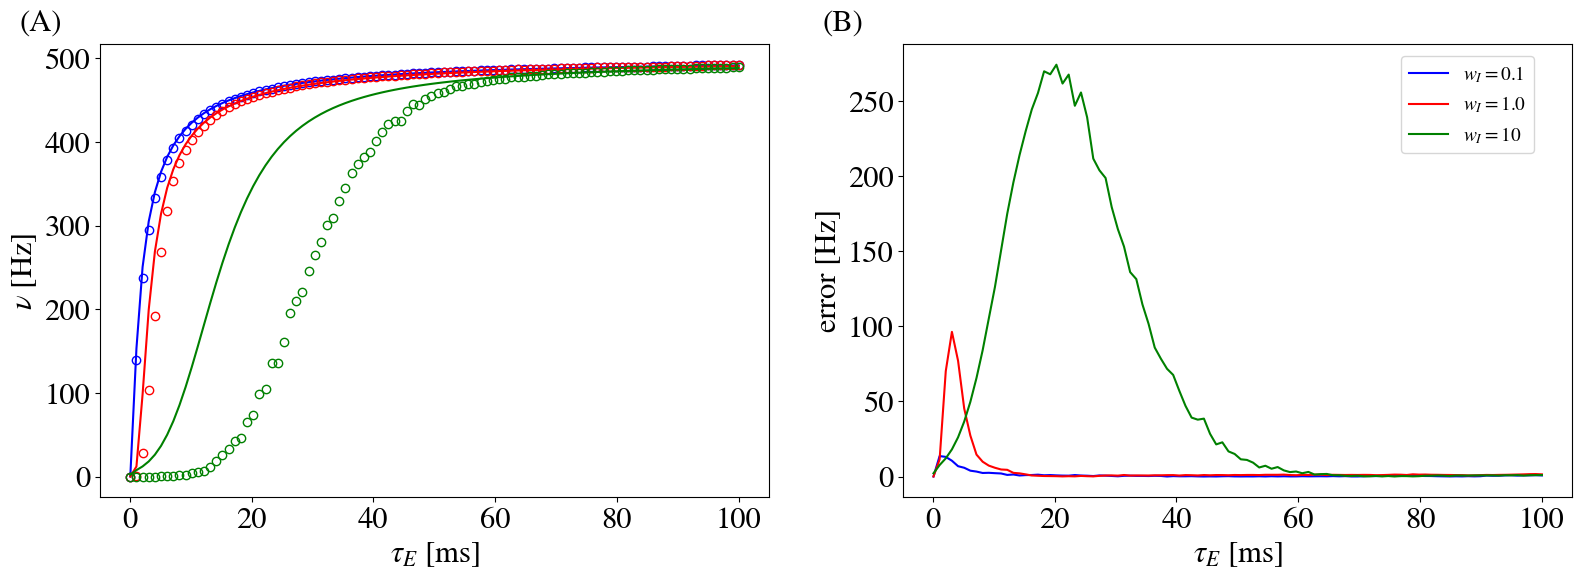

In [7]:
index = list(range(0, 200, 3))

fig, axs = plt.subplots(1, 2, figsize=(19,6), dpi=100, squeeze=False)
axs[0][0].annotate("(A)", xy=(-0.12, 1.03), xycoords="axes fraction")
axs[0][1].annotate("(B)", xy=(-0.12, 1.03), xycoords="axes fraction")

axs[0][0].set_xlabel(r'$\tau_E$ [ms]')
axs[0][1].set_xlabel(r'$\tau_E$ [ms]')
axs[0][0].set_ylabel(r'$\nu$ [Hz]')
axs[0][1].set_ylabel('error [Hz]')

axs[0][0].plot(vec_tau_E, df_nu[vec_w_I[0]]*1000, 'b-', label=r'$w_I = 0.1$')
axs[0][0].plot(vec_tau_E, df_nu_sim[vec_w_I[0]], 'bo', markerfacecolor='none')
axs[0][0].plot(vec_tau_E, df_nu[vec_w_I[1]]*1000, 'r-', label=r'$w_I = 1.0$')
axs[0][0].plot(vec_tau_E, df_nu_sim[vec_w_I[1]], 'ro', markerfacecolor='none')
axs[0][0].plot(vec_tau_E, df_nu[vec_w_I[2]]*1000, 'g-', label=r'$w_I = 10$')
axs[0][0].plot(vec_tau_E, df_nu_sim[vec_w_I[2]], 'go', markerfacecolor='none')

axs[0][1].plot(vec_tau_E, df_error[vec_w_I[0]], 'b-')
axs[0][1].plot(vec_tau_E, df_error[vec_w_I[1]], 'r-')
axs[0][1].plot(vec_tau_E, df_error[vec_w_I[2]], 'g-')
fig.legend(bbox_to_anchor=(0.88, 0.86), loc=1, borderaxespad=0., prop={'size': 14})